<a href="https://colab.research.google.com/github/alphoenixbiz/Deep-Learning-Tensorflow/blob/master/basic_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train your first neural network: basic classification

In [0]:
# !pip install tensorflow==2.0.0-beta1

In [31]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-beta1


## Import the Fashion MNIST dataset

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>



In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [34]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [35]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [36]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [37]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [38]:
len(test_labels)

10000

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

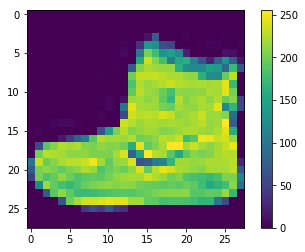

In [39]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

We scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, we divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that we're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

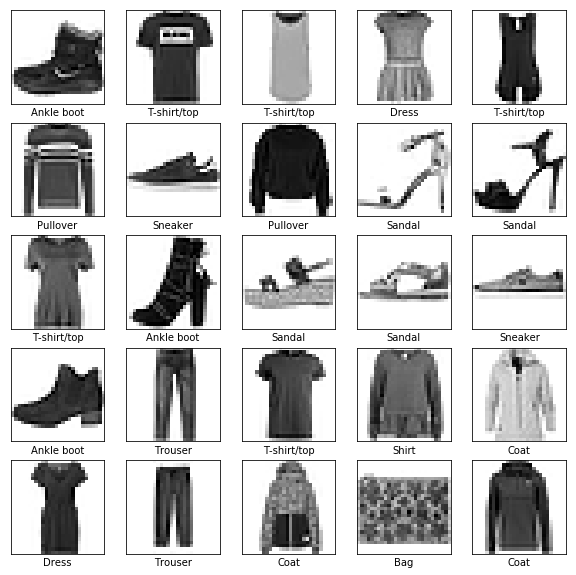

In [41]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.5020 - accuracy: 0.8233
Epoch 2/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.3786 - accuracy: 0.8632
Epoch 3/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3372 - accuracy: 0.8779
Epoch 4/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.3136 - accuracy: 0.8842
Epoch 5/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2961 - accuracy: 0.8915
Epoch 6/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2825 - accuracy: 0.8945
Epoch 7/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2689 - accuracy: 0.9005
Epoch 8/10
60000/60000 [==============================] - 4s 75us/sample - loss: 0.2592 - accuracy: 0.9030
Epoch 9/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2503 - accuracy: 0.9067
Epoch 10/10
60

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.88 (or 88%) on the training data.

## Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [45]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\nTest accuracy:', test_acc)

10000/10000 [==============================] - 0s 43us/sample - loss: 0.3444 - accuracy: 0.8830

Test accuracy: 0.883


## Make predictions

With the model trained, we can use it to make predictions about some images.

In [0]:
predictions = model.predict(test_images)

In [47]:
predictions[0]

array([6.8399064e-09, 1.1505318e-07, 1.2049772e-10, 2.4040943e-09,
       3.6483975e-08, 4.7754118e-05, 8.5432987e-07, 1.4564575e-02,
       9.1832206e-08, 9.8538649e-01], dtype=float32)

In [48]:
np.argmax(predictions[0])

9

In [49]:
test_labels[0]

9

We can graph this to look at the full set of 10 class predictions.

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Let's look at the 0th image, predictions, and prediction array.

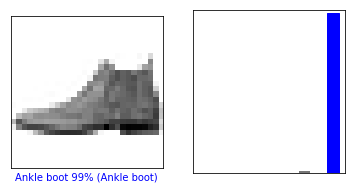

In [51]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

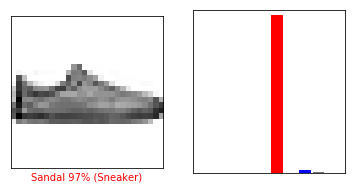

In [52]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

Let's plot several images with their predictions. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label. Note that the model can be wrong even when very confident.

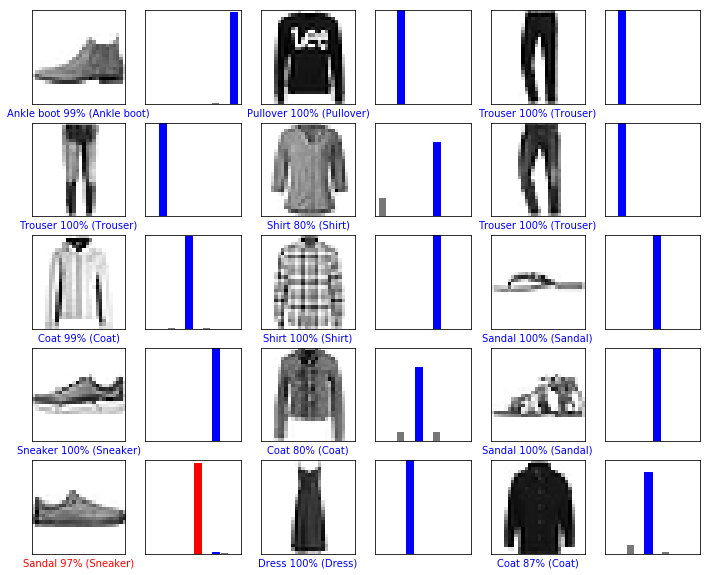

In [53]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

Finally, use the trained model to make a prediction about a single image.

In [54]:
# Grab an image from the test dataset.
img = test_images[0]

print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though we're using a single image, we need to add it to a list:

In [55]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [56]:
predictions_single = model.predict(img)

print(predictions_single)

[[6.8399064e-09 1.1505340e-07 1.2049796e-10 2.4040987e-09 3.6484114e-08
  4.7754165e-05 8.5433146e-07 1.4564567e-02 9.1832206e-08 9.8538649e-01]]


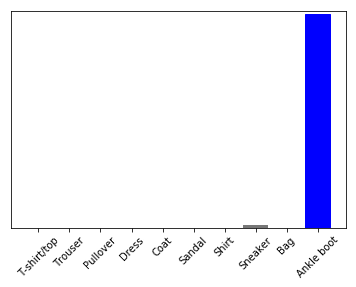

In [57]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [58]:
np.argmax(predictions_single[0])

9

And, as before, the model predicts a label of 9.